# Load Dataset

In [167]:
# Load dataset
import pandas as pd
import sys
import csv

csv.field_size_limit(sys.maxsize)

# Dataset:
df = pd.read_csv("spam_basic.csv", engine="python")

# Create new column represent number of ham or spam
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [168]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [169]:
df.tail()

,Category,Message,spam
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0
5571,ham,Rofl. Its true to its name,0


In [170]:
df.shape

(5572, 3)

In [171]:

df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

# Preprocessing

In [172]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Tokenizing and punctuation removal


In [173]:
# punctuation removal
tokenizer = nltk.RegexpTokenizer(r"\w+")
test_message = "Hey,, Peter feet it going? <HTML><bads> bads 'randoms' badly"

test_message_tokenized = tokenizer.tokenize(test_message)
test_message_tokenized

['Hey',
 'Peter',
 'feet',
 'it',
 'going',
 'HTML',
 'bads',
 'bads',
 'randoms',
 'badly']

Lowercase

In [174]:
# a list of lowercase tokens
test_message_lowercased = [t.lower() for t in test_message_tokenized]
test_message_lowercased

['hey',
 'peter',
 'feet',
 'it',
 'going',
 'html',
 'bads',
 'bads',
 'randoms',
 'badly']

Lemmatization

In [175]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

test_message_lemmatized_tokens = [lemmatizer.lemmatize(t) for t in test_message_lowercased]
test_message_lemmatized_tokens

['hey',
 'peter',
 'foot',
 'it',
 'going',
 'html',
 'bad',
 'bad',
 'randoms',
 'badly']

Remove Stop words

In [176]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

test_message_useful_tokens = []

for w in test_message_lemmatized_tokens:
  if w not in stopwords:
    test_message_useful_tokens.append(w)

test_message_useful_tokens

['hey', 'peter', 'foot', 'going', 'html', 'bad', 'bad', 'randoms', 'badly']

Preprocesing function

In [177]:
def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]

  return useful_tokens

message_to_token_list(test_message)

['hey', 'peter', 'foot', 'going', 'html', 'bad', 'bad', 'randoms', 'badly']

 Shuffling the dataframe with sample method
 - '**frac=1**'  to sample the entire DataFrame, effectively shuffling all rows.
 - '**random_state=1**' ensures reproducibility; using the same random state will produce the same shuffling order.

In [178]:
df = df.sample(frac=1, random_state=1)

Resetting the index:
- After shuffling, the DataFrame's index is reset. The **reset_index** method is used with **drop=True** to reset the index and remove the old index column.

In [179]:
df = df.reset_index(drop=True)

Splitting into Training and Testing Sets

In [180]:
# Take 80% for training and the remaining 20% for testing
split_index = int(len(df) * 0.8)
train_df, test_df = df[:split_index], df[split_index:]

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

train_df, test_df

(     Category                                            Message  spam
 0         ham                       Yep, by the pretty sculpture     0
 1         ham      Yes, princess. Are you going to make me moan?     0
 2         ham                         Welp apparently he retired     0
 3         ham                                            Havent.     0
 4         ham  I forgot 2 ask ü all smth.. There's a card on ...     0
 ...       ...                                                ...   ...
 4452      ham             How about clothes, jewelry, and trips?     0
 4453      ham  Sorry, I'll call later in meeting any thing re...     0
 4454      ham  Babe! I fucking love you too !! You know? Fuck...     0
 4455     spam  U've been selected to stay in 1 of 250 top Bri...     1
 4456      ham  Hello my boytoy ... Geeee I miss you already a...     0
 
 [4457 rows x 3 columns],
      Category                                            Message  spam
 0         ham                      

In [181]:
num_of_features = 50

# Features Selection

Create word frequency

In [182]:
# Empty dictionary for counting the occurrences of tokens in the 'text' column
token_counter = {}

for message in train_df['Message']:
  tokens_list = message_to_token_list(message)

  for token in tokens_list:
    if token in token_counter:
      token_counter[token] += 1
    else:
      token_counter[token] = 1

# the number of unique tokens in the trainin data
len(token_counter)

7168

In [183]:
token_counter

{'yep': 9,
 'pretty': 12,
 'sculpture': 1,
 'yes': 81,
 'princess': 24,
 'going': 146,
 'make': 103,
 'moan': 5,
 'welp': 3,
 'apparently': 4,
 'retired': 1,
 'havent': 20,
 'forgot': 25,
 '2': 427,
 'ask': 76,
 'ü': 128,
 'smth': 15,
 'card': 13,
 'da': 113,
 'present': 8,
 'lei': 17,
 'want': 170,
 'write': 7,
 'sign': 6,
 'ok': 236,
 'thk': 40,
 'got': 176,
 'u': 1006,
 'wan': 46,
 'come': 205,
 'wat': 80,
 'kfc': 1,
 'tuesday': 6,
 'buy': 57,
 'meal': 5,
 'gravy': 1,
 'mark': 6,
 'dear': 96,
 'wa': 191,
 'sleeping': 18,
 'p': 11,
 'pa': 28,
 'nothing': 26,
 'problem': 39,
 'ill': 36,
 'lt': 252,
 'gt': 255,
 'uncle': 15,
 'atlanta': 3,
 'wish': 55,
 'guy': 54,
 'great': 93,
 'semester': 10,
 'phone': 103,
 'another': 33,
 'number': 91,
 'greatest': 2,
 'test': 23,
 'courage': 2,
 'earth': 6,
 'bear': 4,
 'defeat': 2,
 'without': 23,
 'losing': 3,
 'heart': 39,
 'gn': 13,
 'tc': 16,
 'dai': 2,
 'send': 168,
 'resume': 1,
 'id': 17,
 'late': 42,
 'freemsg': 11,
 'replied': 4,
 'text'

In [184]:
token_counter['random']

6

Plot

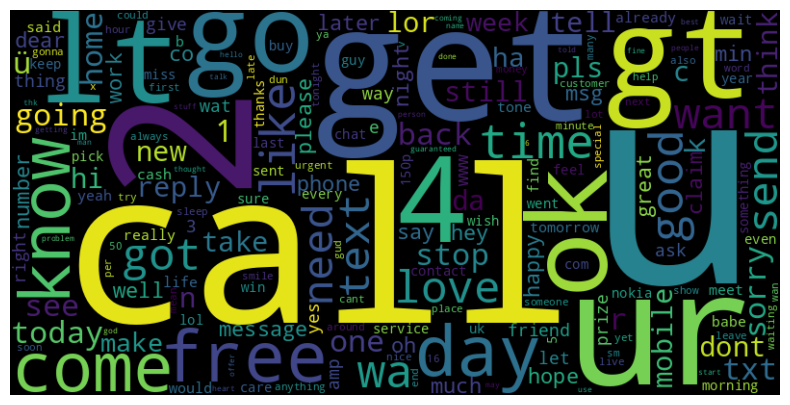

In [185]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming your_dict is your dictionary
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(token_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TD-IDF (term frequency-inverse document frequency)

In [186]:
# list of messages from the training set
list_of_messages = []

for mes in train_df['Message']:
  list_of_messages.append(mes)

list_of_messages


['Yep, by the pretty sculpture',
 'Yes, princess. Are you going to make me moan?',
 'Welp apparently he retired',
 'Havent.',
 "I forgot 2 ask ü all smth.. There's a card on da present lei... How? Ü all want 2 write smth or sign on it?",
 'Ok i thk i got it. Then u wan me 2 come now or wat?',
 'I want kfc its Tuesday. Only buy 2 meals ONLY 2. No gravy. Only 2 Mark. 2!',
 'No dear i was sleeping :-P',
 'Ok pa. Nothing problem:-)',
 'Ill be there on  &lt;#&gt;  ok.',
 'My uncles in Atlanta. Wish you guys a great semester.',
 'My phone',
 'Ok which your another number',
 'The greatest test of courage on earth is to bear defeat without losing heart....gn tc',
 'Dai what this da.. Can i send my resume to this id.',
 'I am late. I will be there at',
 "FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end",
 "K, text me when you're on the way",
 'Congrats! 2 mobile 3G Videophones R yours.

In [187]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer= TfidfVectorizer(use_idf=True,
                        smooth_idf=True,
                        ngram_range=(1,1),stop_words='english')

response= vectorizer.fit_transform(list_of_messages)

In [188]:
# Convert the sparse matrix to a DataFrame for better visualization
df_response = pd.DataFrame(response.toarray(), columns=vectorizer.get_feature_names_out())

df_response

,00,000,000pes,008704050406,0089,01223585334,02,0207,02072069400,02073162414,...,zed,zeros,zhong,zindgi,zoe,zogtorius,zouk,zyada,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature Selection: only keep only the most significant features or tokens based on the threshold

In [189]:
# Set a TF-IDF threshold (adjust as needed)
threshold = 0.5

# Calculate the maximum TF-IDF score for each feature
max_tfidf_per_feature = df_response.max()

max_tfidf_per_feature


00              0.259853
000             0.686225
000pes          0.243166
008704050406    0.296620
0089            0.274967
                  ...   
zogtorius       0.427799
zouk            0.278716
zyada           0.161467
ú1              0.229285
〨ud             0.406794
Length: 7471, dtype: float64

In [190]:
# Select features with maximum TF-IDF score exceeds the threshold
selected_features = df_response.columns[max_tfidf_per_feature > threshold]

print("Selected Features:", selected_features)
print(len(selected_features))
print(type(selected_features))

Selected Features: Index(['000', '0578', '07090201529', '078', '083', '08712400200',
       '08712402578', '08712402779', '08712402902', '08712402972',
       ...
       'yetty', 'yetunde', 'yi', 'yifeng', 'yijue', 'yo', 'youdoing',
       'yoville', 'yrs', 'yup'],
      dtype='object', length=2289)
2289
<class 'pandas.core.indexes.base.Index'>


In [191]:
features = list(selected_features)
features

['000',
 '0578',
 '07090201529',
 '078',
 '083',
 '08712400200',
 '08712402578',
 '08712402779',
 '08712402902',
 '08712402972',
 '08714712388',
 '08715205273',
 '08718738034',
 '08719181503',
 '08719181513',
 '09050000301',
 '09066362231',
 '10',
 '11',
 '15',
 '15pm',
 '165',
 '1hr',
 '20',
 '2marrow',
 '2morro',
 '2mro',
 '2nite',
 '2p',
 '2u2',
 '30',
 '30ish',
 '33',
 '3d',
 '3rd',
 '420',
 '440',
 '449050000301',
 '45pm',
 '4fil',
 '515',
 '530',
 '542',
 '545',
 '6089',
 '65',
 '69698',
 '6hrs',
 '6ish',
 '6times',
 '7ish',
 '85233',
 '87077',
 '88066',
 '89070',
 '8th',
 '910',
 '930',
 '945',
 '946',
 '9ja',
 'aah',
 'aathi',
 'abbey',
 'abi',
 'ability',
 'abj',
 'able',
 'abt',
 'acc',
 'accenture',
 'access',
 'accidentally',
 'accomodate',
 'account',
 'acted',
 'activities',
 'actor',
 'add',
 'addicted',
 'addie',
 'address',
 'administrator',
 'adsense',
 'advance',
 'adventuring',
 'advice',
 'advising',
 'affectionate',
 'afraid',
 'afternoon',
 'ago',
 'ah',
 'aha',


In [192]:
# Create a mapping from tokens to their corresponding indices
token_to_index_mapping = {}

# Enumerate through features to generate indices
for index, token in enumerate(features):
    token_to_index_mapping[token] = index

# Resulting dictionary mapping tokens to indices
token_to_index_mapping

{'000': 0,
 '0578': 1,
 '07090201529': 2,
 '078': 3,
 '083': 4,
 '08712400200': 5,
 '08712402578': 6,
 '08712402779': 7,
 '08712402902': 8,
 '08712402972': 9,
 '08714712388': 10,
 '08715205273': 11,
 '08718738034': 12,
 '08719181503': 13,
 '08719181513': 14,
 '09050000301': 15,
 '09066362231': 16,
 '10': 17,
 '11': 18,
 '15': 19,
 '15pm': 20,
 '165': 21,
 '1hr': 22,
 '20': 23,
 '2marrow': 24,
 '2morro': 25,
 '2mro': 26,
 '2nite': 27,
 '2p': 28,
 '2u2': 29,
 '30': 30,
 '30ish': 31,
 '33': 32,
 '3d': 33,
 '3rd': 34,
 '420': 35,
 '440': 36,
 '449050000301': 37,
 '45pm': 38,
 '4fil': 39,
 '515': 40,
 '530': 41,
 '542': 42,
 '545': 43,
 '6089': 44,
 '65': 45,
 '69698': 46,
 '6hrs': 47,
 '6ish': 48,
 '6times': 49,
 '7ish': 50,
 '85233': 51,
 '87077': 52,
 '88066': 53,
 '89070': 54,
 '8th': 55,
 '910': 56,
 '930': 57,
 '945': 58,
 '946': 59,
 '9ja': 60,
 'aah': 61,
 'aathi': 62,
 'abbey': 63,
 'abi': 64,
 'ability': 65,
 'abj': 66,
 'able': 67,
 'abt': 68,
 'acc': 69,
 'accenture': 70,
 'acce

In [193]:
example_text = "Please deal with ect another bad subject. Enron ECT is actually in deal Houston."
message_to_token_list(example_text)

['please',
 'deal',
 'ect',
 'another',
 'bad',
 'subject',
 'enron',
 'ect',
 'actually',
 'deal',
 'houston']

# Bag of words:

Convert message to bow

In [194]:
import numpy as np

def message_to_bag_of_words(message):
  bag_of_words = np.zeros(len(features))

  processed_list_of_tokens = message_to_token_list(message)

  for token in processed_list_of_tokens:
    if token not in features:
      continue
    index = token_to_index_mapping[token]
    bag_of_words[index] += 1

  return bag_of_words

message_to_bag_of_words(example_text)

array([0., 0., 0., ..., 0., 0., 0.])

In [195]:
train_df.iloc[3]

Category        ham
Message     Havent.
spam              0
Name: 3, dtype: object

In [196]:
# the 4th row
message_to_bag_of_words(train_df['Message'].iloc[3])

array([0., 0., 0., ..., 0., 0., 0.])

The **df_to_X_y** function take the dataframe as input, return a Numpy array '**X**' include bags of words represent each text and the array of labels '**y**' for each bag of words

In [197]:
from nltk.sem.boxer import BoxerWhq

def df_to_X_y(dff):
  # convert 'spam' column to Numpy array of integers
  y = dff['spam'].to_numpy().astype(int)

  text_col = dff['Message']
  bag_of_words = []

  for text in text_col:
    # generate a bag-of-words representation for each text
    bow = message_to_bag_of_words(text)
    bag_of_words.append(bow)

  # Combine bag-of-words representations into a NumPy array
  X = np.array(bag_of_words).astype(int)

  return X, y

Each tuple in the output represents the shape of the corresponding array: (number of samples, number of features) for feature matrices and (number of samples,) for label arrays.

In [198]:
X_train, y_train = df_to_X_y(train_df)

X_test, y_test = df_to_X_y(test_df)

X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [199]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [200]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457, 2289), (4457,), (1115, 2289), (1115,))

# Scalling

In [201]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_train)

X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Logistic Regression Model

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Training a logistic regression model
lr = LogisticRegression().fit(X_train, y_train)

# Use the trained model to predict labels for the test set
y_pred = lr.predict(X_test)

y_pred



array([0, 0, 0, ..., 0, 1, 0])

Evaluating performance

In [203]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       968
           1       0.96      0.72      0.82       147

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



# Prediction

In [113]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'The early 20th century was a banner era for crackers.'
]

bag_of_words = []

for text in emails:
    bow = message_to_bag_of_words(text)
    bag_of_words.append(bow)

emails_count = np.array(bag_of_words).astype(int)
emails_count


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        

In [114]:
emails_count = min_max_scaler.transform(emails_count)
prediction = lr.predict(emails_count)
prediction

array([0, 0, 0])